In [5]:
from IPython.display import Math
from math import factorial
from math import inf
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Potential-Flow" data-toc-modified-id="Potential-Flow-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Potential Flow</a></span></li><li><span><a href="#A-Funny-Perturbation" data-toc-modified-id="A-Funny-Perturbation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>A Funny Perturbation</a></span></li></ul></div>

## Potential Flow

A potential flow of a two-dimensional fluid can be described by the velocity potential $\phi$, such that the fluid velocity is $V = -\nabla \phi$. The potential $\phi$ is the real part of the complex analytic potential $\Phi(z)$, while the stream function ψ is the imaginary part of $\Phi(z)$. Find the fluid velocity $v = (v_x , v_y )$ for the simplest potential flow inside a wedge of angle $\alpha$, i.e. with hard walls at $\theta = 0$ and $\theta = \alpha$. Find the expression for the
stream lines (the lines along which the fluid flows). Use a computer algebra program to
plot several stream lines for $\alpha = \pi/3$.

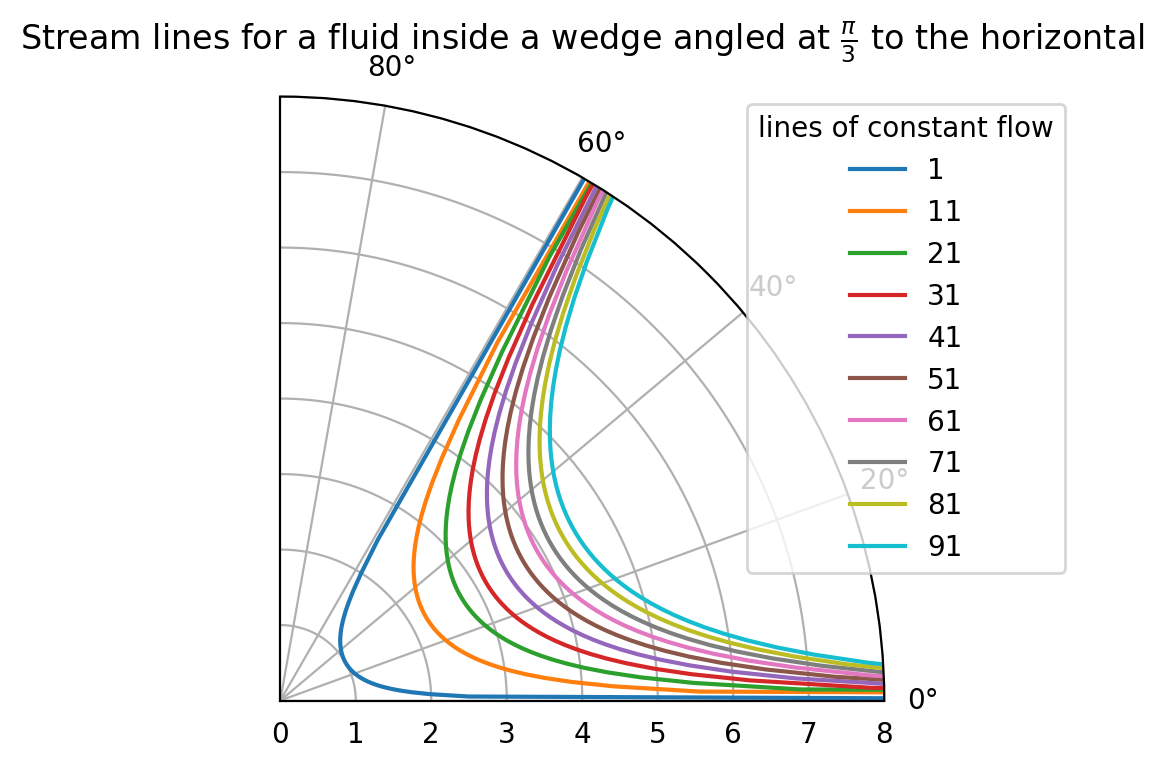

In [6]:
a = '\\frac{\pi}{3}'
theta = np.linspace(0.0001, np.pi / 3 - 0.0001)
plt.rcParams['figure.dpi'] = 200
plt.figure(1)
for c in range(1, 100, 10):
    plt.polar(theta, (c / np.sin(3 * theta))**(1 / 3), label=c)
plt.legend(title='lines of constant flow',
           loc='best',
           bbox_to_anchor=(0.75, 0.5, 0.2, 0.2))
plt.ylim(0, 8)
plt.xlim(0, np.pi / 2)
plt.title(
    'Stream lines for a fluid inside a wedge angled at $%s$ to the horizontal'
    % a)
plt.show()

## A Funny Perturbation

Consider the function

\begin{equation*}
    Z(\lambda) = \frac{1}{\sqrt{2\pi}}\int^{\infty}_{-\infty} d\varphi e^{-\frac{1}{2}\varphi^2 -\lambda \varphi^4}
\end{equation*}

By assuming that $\lambda$ is small and expanding the exponential in powers of $\lambda$, you
generate the expansion $Z(\lambda) = \sum_n c_n \lambda^n$ . Such a procedure is called “perturbation theory”, and is widely used in all fields of physics.

In practice, one keeps only a finite number of terms in the perturbative expansion, i.e. one approximates $Z(\lambda) \approx Z_m (\lambda)$, where $Z_m (\lambda) = \sum^m_{n=0} c_n \lambda^n$ is the result of the perturbation theory to m-th order. Plot $Z_m (\lambda)$ as a function of $\lambda$ for $m = 0, 1, 2, 3, 4$. Write down an explicit formula for $Z(\lambda)$ to 4-th order.

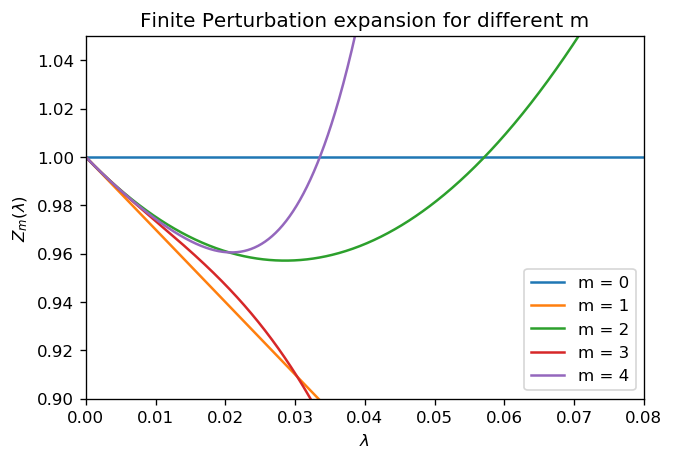

In [7]:
def c_n(n):
    return factorial(4 * n) / (factorial(2 * n) * (-4)**n * factorial(n))


lam = np.arange(0, 0.4, 0.0001)
Z_0 = c_n(0) * lam**0
Z_1 = c_n(0) * lam**0 + c_n(1) * lam**1
Z_2 = c_n(0) * lam**0 + c_n(1) * lam**1 + c_n(2) * lam**2
Z_3 = c_n(0) * lam**0 + c_n(1) * lam**1 + c_n(2) * lam**2 + c_n(3) * lam**3
Z_4 = c_n(0) * lam**0 + c_n(1) * lam**1 + c_n(2) * lam**2 + c_n(
    3) * lam**3 + c_n(4) * lam**4

plt.rcParams['figure.dpi'] = 120
plt.figure()
plt.plot(lam, Z_0, label="m = 0")
plt.plot(lam, Z_1, label="m = 1")
plt.plot(lam, Z_2, label="m = 2")
plt.plot(lam, Z_3, label="m = 3")
plt.plot(lam, Z_4, label="m = 4")
plt.xlim(0, 0.08)
plt.ylim(0.9, 1.05)
plt.xlabel("$\\lambda$")
plt.ylabel("$Z_m(\\lambda)$")
plt.title("Finite Perturbation expansion for different m")
plt.legend(loc=4)
plt.show()

Then we can readily find $Z_m(\lambda)$ to fourth order:
\begin{equation*}
Z_4 = 1 - 3\lambda + \frac{105}{2!}\lambda^2 - \frac{10395}{3!}\lambda^3 + \frac{2027025}{4!}\lambda^4
\end{equation*}


We can also evaluate $Z(\lambda)$ explicitly (e.g. numerically), without using any expansions. Plot the exact result for $Z(\lambda)$ as a function of $\lambda$. 

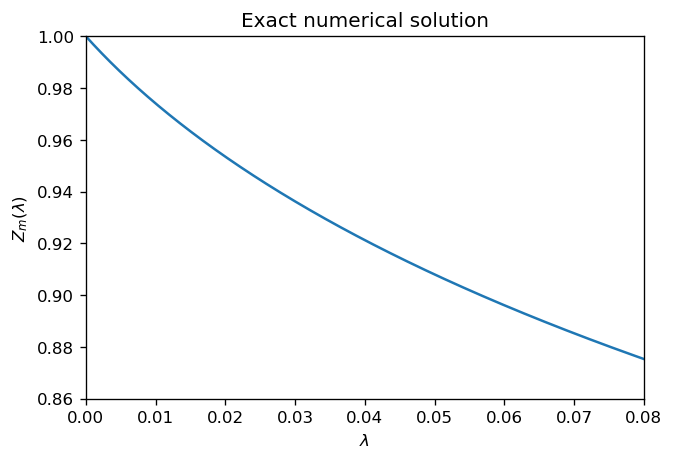

In [8]:
Z_exact = []
for l in lam:
    fir, las = integrate.quad(
        lambda x, l: np.exp(-(0.5 * x**2 + l * x**4)) / (2 * np.pi)**0.5, -inf,
        inf, l)
    Z_exact.append(fir - las)
# end for

plt.figure()
plt.plot(lam, Z_exact, label="numerical solution")
plt.xlim(0, 0.08)
plt.ylim(0.86, 1)
plt.xlabel("$\\lambda$")
plt.ylabel("$Z_m(\\lambda)$")
plt.title("Exact numerical solution")
plt.show()

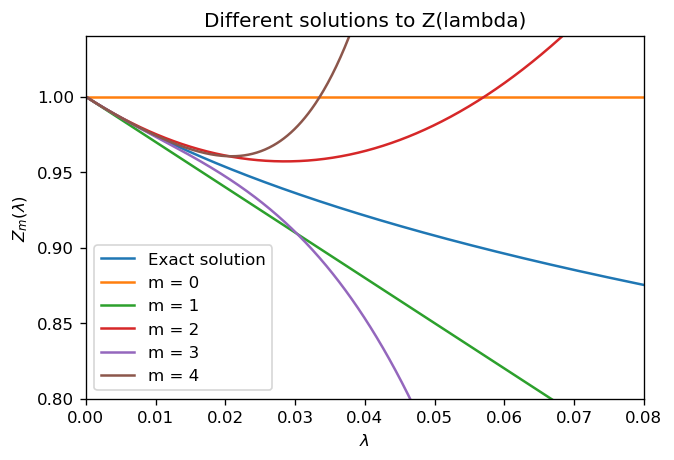

In [9]:
plt.figure()
plt.plot(lam, Z_exact, label="Exact solution")
plt.plot(lam, Z_0, label="m = 0")
plt.plot(lam, Z_1, label="m = 1")
plt.plot(lam, Z_2, label="m = 2")
plt.plot(lam, Z_3, label="m = 3")
plt.plot(lam, Z_4, label="m = 4")
plt.xlim(0, 0.08)
plt.ylim(0.8, 1.04)
plt.legend(loc=3)
plt.xlabel("$\\lambda$")
plt.ylabel("$Z_m(\\lambda)$")
plt.title("Different solutions to Z(lambda)")
plt.show()

The higher order $Z_m(\lambda)$ terms do a better job at approximating the function $Z(\lambda)$, but for higher m the approximations are only good for smaller $\lambda$. That is, the larger m, the faster $Z_m(\lambda)$ diverges.

In this problem the expansion for the function $Z(\lambda) = \frac{1}{\sqrt{2\pi}}\int^{\infty}_{-\infty} d\varphi e^{-\frac{1}{2}\varphi^2 -\lambda \varphi^4}$ using perturbation theory gave a divergent series. However, the exact solution to $Z(\lambda)$ was found and compared to the first 5 terms in the series. Even though the finite perturbation approximations, $Z_m(\lambda)$, diverged. For small values of $\lambda$ (that is $\lambda \le 0.02$) the approximations matched the function reasonably well. Finally, by forming a function $f(\lambda) = n$, we saw as $\lambda$ got smaller, $f(\lambda)$ got larger. This is consistent with our graph directly above, as m got larger $Z_m$ was a better approximation but diverged fast (ie at smaller $\lambda$). 